## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  95.256958  1394.247905  0.081371  3.348161  0.723443
1  47.230385  1004.799281  0.647019  9.380797  1.443198
2  70.083462   618.265482  0.612638  1.897810  1.373087
3  40.610253   651.677372  0.877469  3.992036  1.530395
4  53.096345   643.717867  0.338963  6.350730  1.235706


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.0601  | train_mse: 4.83829 | train_mae: 1.59632 |  0:00:00s
epoch 1  | loss: 0.61534 | train_mse: 3.79043 | train_mae: 1.31924 |  0:00:00s
epoch 2  | loss: 0.48193 | train_mse: 2.3439  | train_mae: 1.08969 |  0:00:00s


epoch 3  | loss: 0.60363 | train_mse: 1.12485 | train_mae: 0.76233 |  0:00:00s
epoch 4  | loss: 0.33624 | train_mse: 0.82139 | train_mae: 0.66727 |  0:00:00s
epoch 5  | loss: 0.51033 | train_mse: 0.67643 | train_mae: 0.63228 |  0:00:00s


epoch 6  | loss: 0.44079 | train_mse: 0.62192 | train_mae: 0.59407 |  0:00:00s
epoch 7  | loss: 0.35605 | train_mse: 0.59185 | train_mae: 0.56396 |  0:00:00s
epoch 8  | loss: 0.25645 | train_mse: 0.63857 | train_mae: 0.60104 |  0:00:00s


epoch 9  | loss: 0.25174 | train_mse: 0.48254 | train_mae: 0.50591 |  0:00:01s
epoch 10 | loss: 0.18306 | train_mse: 0.71062 | train_mae: 0.62341 |  0:00:01s
epoch 11 | loss: 0.38603 | train_mse: 0.47814 | train_mae: 0.49448 |  0:00:01s


epoch 12 | loss: 0.18581 | train_mse: 0.39288 | train_mae: 0.46601 |  0:00:01s
epoch 13 | loss: 0.32199 | train_mse: 0.29404 | train_mae: 0.41566 |  0:00:01s
epoch 14 | loss: 0.20576 | train_mse: 0.25615 | train_mae: 0.38547 |  0:00:01s


epoch 15 | loss: 0.17753 | train_mse: 0.29758 | train_mae: 0.40941 |  0:00:01s
epoch 16 | loss: 0.19147 | train_mse: 0.2881  | train_mae: 0.39778 |  0:00:01s
epoch 17 | loss: 0.19228 | train_mse: 0.29591 | train_mae: 0.40752 |  0:00:01s


epoch 18 | loss: 0.18741 | train_mse: 0.21114 | train_mae: 0.35337 |  0:00:01s
epoch 19 | loss: 0.29285 | train_mse: 0.18322 | train_mae: 0.32107 |  0:00:01s
epoch 20 | loss: 0.17051 | train_mse: 0.20415 | train_mae: 0.34706 |  0:00:01s


epoch 21 | loss: 0.17323 | train_mse: 0.19764 | train_mae: 0.34419 |  0:00:02s
epoch 22 | loss: 0.1703  | train_mse: 0.11019 | train_mae: 0.27648 |  0:00:02s
epoch 23 | loss: 0.24159 | train_mse: 0.11666 | train_mae: 0.27475 |  0:00:02s


epoch 24 | loss: 0.19102 | train_mse: 0.12022 | train_mae: 0.28197 |  0:00:02s
epoch 25 | loss: 0.18986 | train_mse: 0.11962 | train_mae: 0.27687 |  0:00:02s
epoch 26 | loss: 0.12236 | train_mse: 0.10183 | train_mae: 0.26164 |  0:00:02s


epoch 27 | loss: 0.13622 | train_mse: 0.09659 | train_mae: 0.26368 |  0:00:02s
epoch 28 | loss: 0.1996  | train_mse: 0.09167 | train_mae: 0.2474  |  0:00:02s
epoch 29 | loss: 0.25425 | train_mse: 0.09929 | train_mae: 0.25254 |  0:00:02s


epoch 30 | loss: 0.14571 | train_mse: 0.10666 | train_mae: 0.26155 |  0:00:02s
epoch 31 | loss: 0.10697 | train_mse: 0.09524 | train_mae: 0.2485  |  0:00:02s
epoch 32 | loss: 0.13343 | train_mse: 0.11139 | train_mae: 0.26052 |  0:00:03s


epoch 33 | loss: 0.18076 | train_mse: 0.10399 | train_mae: 0.24539 |  0:00:03s
epoch 34 | loss: 0.17032 | train_mse: 0.10256 | train_mae: 0.25367 |  0:00:03s
epoch 35 | loss: 0.10622 | train_mse: 0.11815 | train_mae: 0.27036 |  0:00:03s


epoch 36 | loss: 0.15081 | train_mse: 0.19812 | train_mae: 0.33955 |  0:00:03s
epoch 37 | loss: 0.23403 | train_mse: 0.14809 | train_mae: 0.30814 |  0:00:03s
epoch 38 | loss: 0.23498 | train_mse: 0.11385 | train_mae: 0.26794 |  0:00:03s


epoch 39 | loss: 0.19393 | train_mse: 0.12956 | train_mae: 0.27044 |  0:00:03s
epoch 40 | loss: 0.28992 | train_mse: 0.1442  | train_mae: 0.27892 |  0:00:03s
epoch 41 | loss: 0.17869 | train_mse: 0.12071 | train_mae: 0.27162 |  0:00:03s


epoch 42 | loss: 0.17471 | train_mse: 0.14355 | train_mae: 0.29683 |  0:00:03s
epoch 43 | loss: 0.16057 | train_mse: 0.16358 | train_mae: 0.30943 |  0:00:03s
epoch 44 | loss: 0.16392 | train_mse: 0.12982 | train_mae: 0.27704 |  0:00:04s


epoch 45 | loss: 0.17694 | train_mse: 0.13164 | train_mae: 0.28938 |  0:00:04s
epoch 46 | loss: 0.2604  | train_mse: 0.17248 | train_mae: 0.31063 |  0:00:04s
epoch 47 | loss: 0.17124 | train_mse: 0.10313 | train_mae: 0.25666 |  0:00:04s


epoch 48 | loss: 0.16299 | train_mse: 0.18237 | train_mae: 0.28081 |  0:00:04s
epoch 49 | loss: 0.20164 | train_mse: 0.18564 | train_mae: 0.2888  |  0:00:04s
epoch 50 | loss: 0.17428 | train_mse: 0.16236 | train_mae: 0.28568 |  0:00:04s


epoch 51 | loss: 0.17886 | train_mse: 0.14601 | train_mae: 0.27991 |  0:00:04s
epoch 52 | loss: 0.20807 | train_mse: 0.14264 | train_mae: 0.2872  |  0:00:04s
epoch 53 | loss: 0.17493 | train_mse: 0.15406 | train_mae: 0.30109 |  0:00:04s


epoch 54 | loss: 0.19114 | train_mse: 0.21617 | train_mae: 0.33171 |  0:00:04s
epoch 55 | loss: 0.11673 | train_mse: 0.23041 | train_mae: 0.3357  |  0:00:04s
epoch 56 | loss: 0.22661 | train_mse: 0.20467 | train_mae: 0.30376 |  0:00:05s


epoch 57 | loss: 0.08252 | train_mse: 0.1207  | train_mae: 0.2763  |  0:00:05s
epoch 58 | loss: 0.20025 | train_mse: 0.19797 | train_mae: 0.3109  |  0:00:05s
epoch 59 | loss: 0.27469 | train_mse: 0.11121 | train_mae: 0.26999 |  0:00:05s


epoch 60 | loss: 0.30535 | train_mse: 0.14267 | train_mae: 0.28266 |  0:00:05s
epoch 61 | loss: 0.22898 | train_mse: 0.17111 | train_mae: 0.29899 |  0:00:05s
epoch 62 | loss: 0.22108 | train_mse: 0.14502 | train_mae: 0.28196 |  0:00:05s


epoch 63 | loss: 0.12333 | train_mse: 0.12664 | train_mae: 0.26591 |  0:00:05s
epoch 64 | loss: 0.14557 | train_mse: 0.14039 | train_mae: 0.28516 |  0:00:05s
epoch 65 | loss: 0.2635  | train_mse: 0.16495 | train_mae: 0.30883 |  0:00:05s


epoch 66 | loss: 0.11688 | train_mse: 0.17608 | train_mae: 0.32418 |  0:00:05s
epoch 67 | loss: 0.16752 | train_mse: 0.15064 | train_mae: 0.29688 |  0:00:05s


epoch 68 | loss: 0.25998 | train_mse: 0.11683 | train_mae: 0.26478 |  0:00:06s
epoch 69 | loss: 0.14324 | train_mse: 0.11026 | train_mae: 0.24462 |  0:00:06s
epoch 70 | loss: 0.21218 | train_mse: 0.11952 | train_mae: 0.2422  |  0:00:06s


epoch 71 | loss: 0.28102 | train_mse: 0.13404 | train_mae: 0.25994 |  0:00:06s
epoch 72 | loss: 0.17656 | train_mse: 0.13951 | train_mae: 0.27468 |  0:00:06s
epoch 73 | loss: 0.25098 | train_mse: 0.1545  | train_mae: 0.29321 |  0:00:06s


epoch 74 | loss: 0.15018 | train_mse: 0.14549 | train_mae: 0.28523 |  0:00:06s
epoch 75 | loss: 0.15483 | train_mse: 0.14542 | train_mae: 0.28743 |  0:00:06s
epoch 76 | loss: 0.21565 | train_mse: 0.12186 | train_mae: 0.25874 |  0:00:06s


epoch 77 | loss: 0.16947 | train_mse: 0.11374 | train_mae: 0.24555 |  0:00:06s
epoch 78 | loss: 0.12278 | train_mse: 0.12836 | train_mae: 0.25245 |  0:00:06s
epoch 79 | loss: 0.17922 | train_mse: 0.13078 | train_mae: 0.2581  |  0:00:07s


epoch 80 | loss: 0.19076 | train_mse: 0.12778 | train_mae: 0.25538 |  0:00:07s
epoch 81 | loss: 0.20472 | train_mse: 0.12424 | train_mae: 0.25438 |  0:00:07s
epoch 82 | loss: 0.16396 | train_mse: 0.09569 | train_mae: 0.22833 |  0:00:07s


epoch 83 | loss: 0.16328 | train_mse: 0.08605 | train_mae: 0.2215  |  0:00:07s
epoch 84 | loss: 0.18818 | train_mse: 0.09474 | train_mae: 0.24028 |  0:00:07s
epoch 85 | loss: 0.16352 | train_mse: 0.10357 | train_mae: 0.24685 |  0:00:07s


epoch 86 | loss: 0.13168 | train_mse: 0.11793 | train_mae: 0.25867 |  0:00:07s
epoch 87 | loss: 0.19915 | train_mse: 0.11617 | train_mae: 0.25383 |  0:00:07s
epoch 88 | loss: 0.16293 | train_mse: 0.11239 | train_mae: 0.24788 |  0:00:07s


epoch 89 | loss: 0.14388 | train_mse: 0.0915  | train_mae: 0.21886 |  0:00:07s
epoch 90 | loss: 0.25469 | train_mse: 0.09534 | train_mae: 0.23568 |  0:00:07s
epoch 91 | loss: 0.1599  | train_mse: 0.11931 | train_mae: 0.2548  |  0:00:08s


epoch 92 | loss: 0.18058 | train_mse: 0.13447 | train_mae: 0.2618  |  0:00:08s
epoch 93 | loss: 0.12722 | train_mse: 0.12097 | train_mae: 0.25328 |  0:00:08s
epoch 94 | loss: 0.14047 | train_mse: 0.11067 | train_mae: 0.23997 |  0:00:08s


epoch 95 | loss: 0.11784 | train_mse: 0.10236 | train_mae: 0.23486 |  0:00:08s
epoch 96 | loss: 0.14223 | train_mse: 0.10847 | train_mae: 0.2419  |  0:00:08s
epoch 97 | loss: 0.18338 | train_mse: 0.13558 | train_mae: 0.26624 |  0:00:08s


epoch 98 | loss: 0.21278 | train_mse: 0.12202 | train_mae: 0.24679 |  0:00:08s
epoch 99 | loss: 0.18511 | train_mse: 0.12835 | train_mae: 0.2549  |  0:00:08s
epoch 100| loss: 0.16232 | train_mse: 0.1376  | train_mae: 0.28108 |  0:00:08s


epoch 101| loss: 0.15376 | train_mse: 0.13505 | train_mae: 0.28856 |  0:00:08s


epoch 102| loss: 0.13338 | train_mse: 0.12823 | train_mae: 0.27234 |  0:00:09s
epoch 103| loss: 0.10815 | train_mse: 0.12705 | train_mae: 0.27005 |  0:00:09s


epoch 104| loss: 0.21876 | train_mse: 0.12511 | train_mae: 0.26289 |  0:00:09s
epoch 105| loss: 0.15008 | train_mse: 0.11174 | train_mae: 0.24635 |  0:00:09s
epoch 106| loss: 0.1516  | train_mse: 0.11316 | train_mae: 0.25039 |  0:00:09s


epoch 107| loss: 0.13954 | train_mse: 0.101   | train_mae: 0.23857 |  0:00:09s
epoch 108| loss: 0.14832 | train_mse: 0.10527 | train_mae: 0.2458  |  0:00:09s


epoch 109| loss: 0.16942 | train_mse: 0.10062 | train_mae: 0.24968 |  0:00:09s
epoch 110| loss: 0.14531 | train_mse: 0.09682 | train_mae: 0.24289 |  0:00:10s


epoch 111| loss: 0.14509 | train_mse: 0.0906  | train_mae: 0.22982 |  0:00:10s
epoch 112| loss: 0.18933 | train_mse: 0.08698 | train_mae: 0.22832 |  0:00:10s


epoch 113| loss: 0.21075 | train_mse: 0.09764 | train_mae: 0.24074 |  0:00:10s
epoch 114| loss: 0.21499 | train_mse: 0.10212 | train_mae: 0.23545 |  0:00:10s
epoch 115| loss: 0.17055 | train_mse: 0.10334 | train_mae: 0.23836 |  0:00:10s


epoch 116| loss: 0.14301 | train_mse: 0.09078 | train_mae: 0.2294  |  0:00:10s
epoch 117| loss: 0.12805 | train_mse: 0.0936  | train_mae: 0.23367 |  0:00:10s
epoch 118| loss: 0.18986 | train_mse: 0.10219 | train_mae: 0.24052 |  0:00:10s


epoch 119| loss: 0.30116 | train_mse: 0.099   | train_mae: 0.23604 |  0:00:10s
epoch 120| loss: 0.21067 | train_mse: 0.08615 | train_mae: 0.22466 |  0:00:10s
epoch 121| loss: 0.11186 | train_mse: 0.09298 | train_mae: 0.22141 |  0:00:11s


epoch 122| loss: 0.1324  | train_mse: 0.08834 | train_mae: 0.22001 |  0:00:11s
epoch 123| loss: 0.16865 | train_mse: 0.0809  | train_mae: 0.21849 |  0:00:11s
epoch 124| loss: 0.18424 | train_mse: 0.0823  | train_mae: 0.228   |  0:00:11s


epoch 125| loss: 0.13857 | train_mse: 0.08033 | train_mae: 0.21256 |  0:00:11s
epoch 126| loss: 0.16075 | train_mse: 0.09256 | train_mae: 0.2205  |  0:00:11s
epoch 127| loss: 0.09617 | train_mse: 0.06847 | train_mae: 0.20378 |  0:00:11s


epoch 128| loss: 0.1061  | train_mse: 0.08466 | train_mae: 0.2225  |  0:00:11s
epoch 129| loss: 0.17302 | train_mse: 0.08678 | train_mae: 0.22838 |  0:00:11s
epoch 130| loss: 0.15747 | train_mse: 0.07804 | train_mae: 0.20956 |  0:00:11s


epoch 131| loss: 0.12006 | train_mse: 0.10021 | train_mae: 0.23565 |  0:00:11s
epoch 132| loss: 0.13422 | train_mse: 0.10624 | train_mae: 0.24769 |  0:00:11s
epoch 133| loss: 0.15203 | train_mse: 0.09796 | train_mae: 0.24569 |  0:00:12s


epoch 134| loss: 0.11439 | train_mse: 0.08032 | train_mae: 0.21887 |  0:00:12s
epoch 135| loss: 0.24339 | train_mse: 0.08005 | train_mae: 0.22009 |  0:00:12s
epoch 136| loss: 0.16364 | train_mse: 0.08505 | train_mae: 0.22563 |  0:00:12s


epoch 137| loss: 0.21416 | train_mse: 0.08137 | train_mae: 0.22476 |  0:00:12s
epoch 138| loss: 0.09495 | train_mse: 0.07797 | train_mae: 0.22277 |  0:00:12s
epoch 139| loss: 0.12197 | train_mse: 0.07904 | train_mae: 0.21852 |  0:00:12s


epoch 140| loss: 0.12885 | train_mse: 0.07454 | train_mae: 0.21208 |  0:00:12s
epoch 141| loss: 0.17784 | train_mse: 0.07021 | train_mae: 0.20714 |  0:00:12s
epoch 142| loss: 0.17652 | train_mse: 0.08367 | train_mae: 0.22961 |  0:00:12s


epoch 143| loss: 0.1259  | train_mse: 0.06924 | train_mae: 0.21468 |  0:00:12s
epoch 144| loss: 0.2281  | train_mse: 0.10378 | train_mae: 0.23822 |  0:00:13s


epoch 145| loss: 0.16375 | train_mse: 0.10376 | train_mae: 0.24088 |  0:00:13s
epoch 146| loss: 0.12298 | train_mse: 0.08095 | train_mae: 0.22335 |  0:00:13s
epoch 147| loss: 0.14659 | train_mse: 0.07928 | train_mae: 0.21682 |  0:00:13s


epoch 148| loss: 0.19089 | train_mse: 0.08886 | train_mae: 0.23134 |  0:00:13s
epoch 149| loss: 0.26473 | train_mse: 0.08439 | train_mae: 0.22845 |  0:00:13s
epoch 150| loss: 0.12384 | train_mse: 0.07215 | train_mae: 0.20492 |  0:00:13s


epoch 151| loss: 0.14538 | train_mse: 0.08685 | train_mae: 0.22514 |  0:00:13s
epoch 152| loss: 0.16275 | train_mse: 0.09239 | train_mae: 0.23468 |  0:00:13s
epoch 153| loss: 0.11815 | train_mse: 0.08564 | train_mae: 0.21932 |  0:00:13s


epoch 154| loss: 0.2868  | train_mse: 0.09683 | train_mae: 0.23759 |  0:00:13s
epoch 155| loss: 0.11788 | train_mse: 0.08204 | train_mae: 0.21834 |  0:00:13s
epoch 156| loss: 0.1266  | train_mse: 0.06796 | train_mae: 0.20587 |  0:00:14s


epoch 157| loss: 0.11593 | train_mse: 0.0619  | train_mae: 0.19729 |  0:00:14s
epoch 158| loss: 0.12285 | train_mse: 0.07268 | train_mae: 0.21129 |  0:00:14s
epoch 159| loss: 0.17395 | train_mse: 0.06693 | train_mae: 0.20518 |  0:00:14s


epoch 160| loss: 0.14386 | train_mse: 0.08606 | train_mae: 0.22333 |  0:00:14s
epoch 161| loss: 0.12183 | train_mse: 0.08417 | train_mae: 0.21378 |  0:00:14s
epoch 162| loss: 0.1033  | train_mse: 0.07917 | train_mae: 0.20818 |  0:00:14s


epoch 163| loss: 0.10538 | train_mse: 0.0704  | train_mae: 0.20112 |  0:00:14s
epoch 164| loss: 0.10994 | train_mse: 0.06603 | train_mae: 0.2006  |  0:00:14s
epoch 165| loss: 0.10572 | train_mse: 0.06166 | train_mae: 0.19142 |  0:00:14s


epoch 166| loss: 0.09354 | train_mse: 0.05727 | train_mae: 0.18646 |  0:00:14s
epoch 167| loss: 0.20934 | train_mse: 0.07153 | train_mae: 0.20882 |  0:00:14s
epoch 168| loss: 0.25983 | train_mse: 0.06301 | train_mae: 0.19863 |  0:00:15s


epoch 169| loss: 0.10217 | train_mse: 0.06742 | train_mae: 0.20973 |  0:00:15s
epoch 170| loss: 0.09549 | train_mse: 0.07175 | train_mae: 0.21418 |  0:00:15s
epoch 171| loss: 0.12405 | train_mse: 0.0805  | train_mae: 0.22335 |  0:00:15s


epoch 172| loss: 0.19853 | train_mse: 0.10401 | train_mae: 0.24478 |  0:00:15s
epoch 173| loss: 0.22441 | train_mse: 0.14072 | train_mae: 0.27897 |  0:00:15s
epoch 174| loss: 0.17415 | train_mse: 0.11322 | train_mae: 0.2482  |  0:00:15s


epoch 175| loss: 0.1441  | train_mse: 0.07    | train_mae: 0.21337 |  0:00:15s
epoch 176| loss: 0.17629 | train_mse: 0.06382 | train_mae: 0.20474 |  0:00:15s
epoch 177| loss: 0.11695 | train_mse: 0.06613 | train_mae: 0.20416 |  0:00:15s


epoch 178| loss: 0.12859 | train_mse: 0.07991 | train_mae: 0.22325 |  0:00:15s
epoch 179| loss: 0.10539 | train_mse: 0.08834 | train_mae: 0.23292 |  0:00:16s
epoch 180| loss: 0.11183 | train_mse: 0.08302 | train_mae: 0.2277  |  0:00:16s


epoch 181| loss: 0.0783  | train_mse: 0.0749  | train_mae: 0.21993 |  0:00:16s
epoch 182| loss: 0.07927 | train_mse: 0.06787 | train_mae: 0.21228 |  0:00:16s
epoch 183| loss: 0.13013 | train_mse: 0.07397 | train_mae: 0.22319 |  0:00:16s


epoch 184| loss: 0.13329 | train_mse: 0.07655 | train_mae: 0.22374 |  0:00:16s
epoch 185| loss: 0.11582 | train_mse: 0.10761 | train_mae: 0.24955 |  0:00:16s
epoch 186| loss: 0.07951 | train_mse: 0.19286 | train_mae: 0.26413 |  0:00:16s


epoch 187| loss: 0.11411 | train_mse: 0.07157 | train_mae: 0.21642 |  0:00:16s
epoch 188| loss: 0.20044 | train_mse: 0.06901 | train_mae: 0.21654 |  0:00:16s
epoch 189| loss: 0.15658 | train_mse: 0.05435 | train_mae: 0.19494 |  0:00:16s


epoch 190| loss: 0.1026  | train_mse: 0.05957 | train_mae: 0.20217 |  0:00:16s
epoch 191| loss: 0.17238 | train_mse: 0.0652  | train_mae: 0.21242 |  0:00:17s
epoch 192| loss: 0.1111  | train_mse: 0.06295 | train_mae: 0.21316 |  0:00:17s


epoch 193| loss: 0.25426 | train_mse: 0.08724 | train_mae: 0.22099 |  0:00:17s
epoch 194| loss: 0.11054 | train_mse: 0.08265 | train_mae: 0.21783 |  0:00:17s
epoch 195| loss: 0.11205 | train_mse: 0.06862 | train_mae: 0.21295 |  0:00:17s


epoch 196| loss: 0.07181 | train_mse: 0.06722 | train_mae: 0.21041 |  0:00:17s
epoch 197| loss: 0.11042 | train_mse: 0.11746 | train_mae: 0.23452 |  0:00:17s
epoch 198| loss: 0.15295 | train_mse: 0.08418 | train_mae: 0.2163  |  0:00:17s


epoch 199| loss: 0.09989 | train_mse: 0.06875 | train_mae: 0.20298 |  0:00:17s
epoch 200| loss: 0.14995 | train_mse: 0.0908  | train_mae: 0.22259 |  0:00:17s
epoch 201| loss: 0.12629 | train_mse: 0.07184 | train_mae: 0.20785 |  0:00:17s


epoch 202| loss: 0.0861  | train_mse: 0.06286 | train_mae: 0.20225 |  0:00:18s
epoch 203| loss: 0.10038 | train_mse: 0.09367 | train_mae: 0.23697 |  0:00:18s
epoch 204| loss: 0.1264  | train_mse: 0.06556 | train_mae: 0.20528 |  0:00:18s


epoch 205| loss: 0.07663 | train_mse: 0.06163 | train_mae: 0.19763 |  0:00:18s
epoch 206| loss: 0.12112 | train_mse: 0.07016 | train_mae: 0.20794 |  0:00:18s


epoch 207| loss: 0.12058 | train_mse: 0.06336 | train_mae: 0.19898 |  0:00:18s
epoch 208| loss: 0.10339 | train_mse: 0.06957 | train_mae: 0.21472 |  0:00:18s
epoch 209| loss: 0.079   | train_mse: 0.06474 | train_mae: 0.2116  |  0:00:18s


epoch 210| loss: 0.13507 | train_mse: 0.06094 | train_mae: 0.20684 |  0:00:18s
epoch 211| loss: 0.11494 | train_mse: 0.06315 | train_mae: 0.20591 |  0:00:18s
epoch 212| loss: 0.10434 | train_mse: 0.0668  | train_mae: 0.20643 |  0:00:18s


epoch 213| loss: 0.14147 | train_mse: 0.07436 | train_mae: 0.21207 |  0:00:19s
epoch 214| loss: 0.09965 | train_mse: 0.07586 | train_mae: 0.21518 |  0:00:19s


epoch 215| loss: 0.13188 | train_mse: 0.06844 | train_mae: 0.20798 |  0:00:19s
epoch 216| loss: 0.099   | train_mse: 0.05773 | train_mae: 0.19559 |  0:00:19s

Early stopping occurred at epoch 216 with best_epoch = 166 and best_train_mae = 0.18646
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

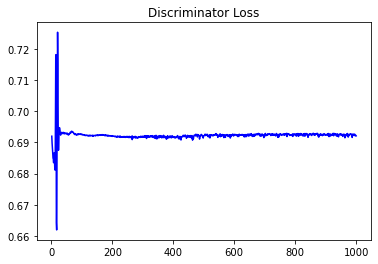

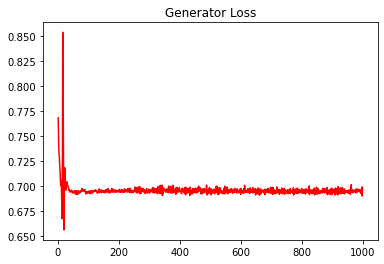

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.0737569908287334


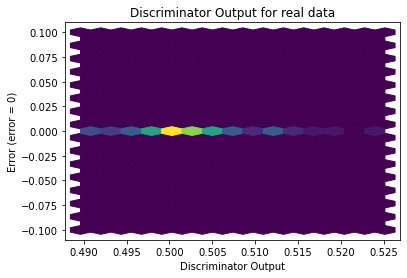

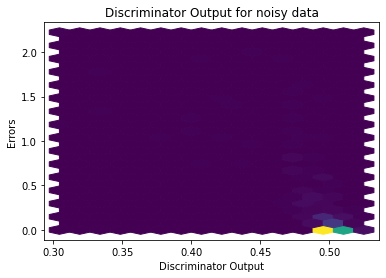

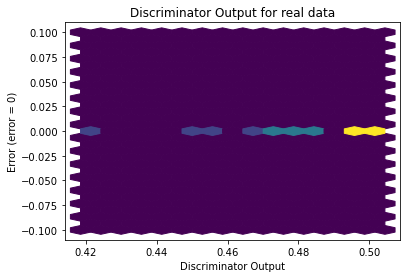

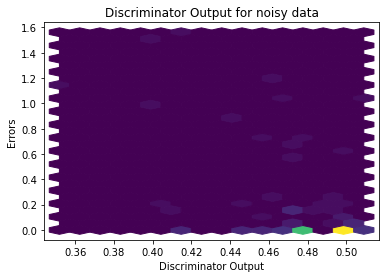

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


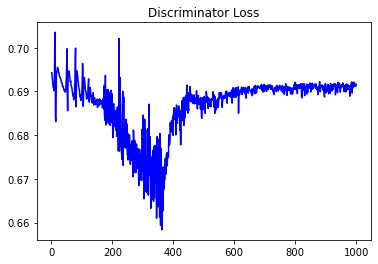

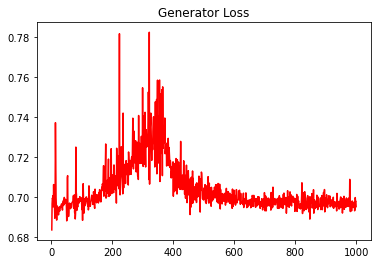

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.9231854266424899


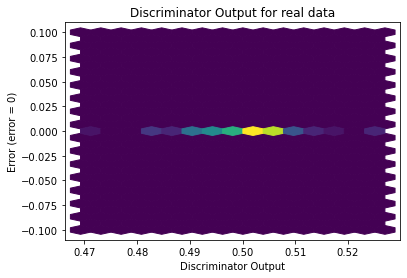

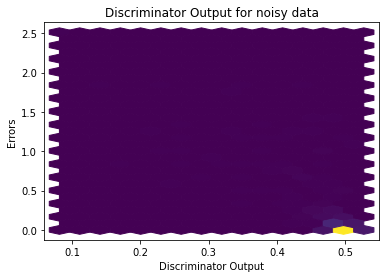

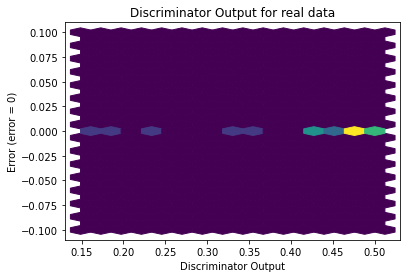

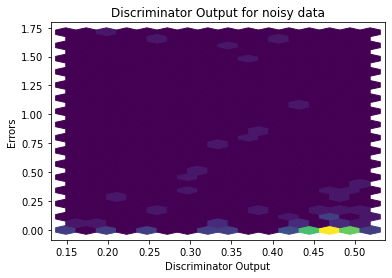

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1160]], requires_grad=True)
